In [1]:
from skimage import io, data
import os
import numpy as np
import skimage
from matplotlib.pyplot import figure, subplot
from scipy import ndimage, signal
from skimage import io, img_as_float, data, filters, img_as_ubyte, util
from matplotlib import pyplot as plt
from skimage.feature import canny
from skimage.filters import median, gaussian, sobel
from skimage.morphology import dilation, erosion, disk
from skimage.filters.edges import convolve
from ipykernel.pylab.backend_inline import flush_figures
from ipywidgets import interact, interactive, fixed
from numpy import array
import warnings
import cv2

In [2]:
class Load:
    def __init__(self):
        return

    @staticmethod
    def img(file):
        img = cv2.imread('C:/Users/czart/Desktop/Studia/kck/lab4/res/'+file, cv2.IMREAD_UNCHANGED)
        return img

In [17]:
class Filter:
    def __init__(self):
        return

    @staticmethod
    def gray(img):
        gray_img = io.imread(img, as_gray=True)
        #figure(figsize=(20,20))
        #io.imshow(gray_img)
        #plt.show()
        return gray_img

    @staticmethod
    def median(img):
        #median_img = io.imread(img)
        med = median(img, disk(3))
        #io.imshow(med)
        #plt.show()
        return med
        
    @staticmethod
    def gaussian(img):
        gaus_img = io.imread(img)
        gaus = gaussian(gaus_img, sigma=1)
        #io.imshow(gaus)
        #plt.show()
        return gaus

    @staticmethod
    def sobel(img):
        warnings.simplefilter("ignore")
        sob = sobel(img)
        return sob

    @staticmethod
    def canny(img):
        warnings.simplefilter("ignore")
        figure(figsize=(20,20))
        can_img = io.imread(img)
        can = ski.feature.canny(img, sigma=3)
        return can
    @staticmethod
    def dilation(img):
        dilation_img = io.imread(img)
        dil = dilation(dilation_img)
        #io.imshow(dil)
        #plt.show()
        return dil
       
    @staticmethod
    def erosion(img):
        erosion_img = io.imread(img)
        ero = erosion(erosion_img)
        #io.imshow(ero)
        #plt.show()
        return ero

    @staticmethod
    def contur3(img_in):
        warnings.simplefilter("ignore")
        #img = img_as_float(io.imread(img_in)) 
        img = img_as_float(img_in)
        
        Kh = array([[ 1, 2, 1],
                    [ 0, 0, 0],
                    [-1,-2,-1]]) 
        Kh = Kh / 4

        Kv = array([[ 1, 0,-1],
                    [ 2, 0,-2],
                    [ 1, 0,-1]])
        Kv = Kv / 4

        hor = np.abs(convolve(img, Kh))
        ver = np.abs(convolve(img, Kv))
        
        res = np.sqrt(hor**2 + ver**2)
        #res = np.sqrt(hor*0.5 + ver*0.5)
        #res = (hor+ver)/2

        return res
    def thresh(img, t):
        warnings.simplefilter("ignore")
        binary = (img > t) * 255
        binary = np.uint8(binary)
        return binary
    
    def on_change(img, perc=0.5):
        MIN = np.percentile(img, perc)
        MAX = np.percentile(img, 100-perc)
        #Percentyl – kwantyl rzędu k/100, gdzie k=1, … , 99.
        #Intuicyjnie mówiąc, percentyl jest wielkością, poniżej której padają wartości zadanego procentu próbek.

        norm = (img - MIN) / (MAX - MIN)
        norm[norm[:,:] > 1] = 1
        norm[norm[:,:] < 0] = 0
        
        return norm
        #figure(figsize=(15,5))
        #subplot(1,2,1); plt.imshow(norm, cmap='gray')
        #flush_figures()
    @staticmethod    
    def noise(img, noise_prop = 0.0):
        warnings.simplefilter("ignore")
        imgProc = skimage.util.random_noise(img[0], mode='s&p', amount=noise_prop)    
        out = filters.median(imgProc)
        #out = imgProc
        return out
        #axes[0].imshow(out, cmap=plt.cm.gray)
        #getHist(out, axes[1])
        #flush_figures()

    @staticmethod
    def make_contour(img):
        g_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        #edged = cv2.Canny(g_img, 30, 200)
        thresh = 100
        ret, t_img = cv2.threshold(g_img, thresh, 255, cv2.THRESH_BINARY)
        
        contours, hierarchy = cv2.findContours(t_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        img_contours = np.zeros(img.shape)
        return contours, img_contours

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


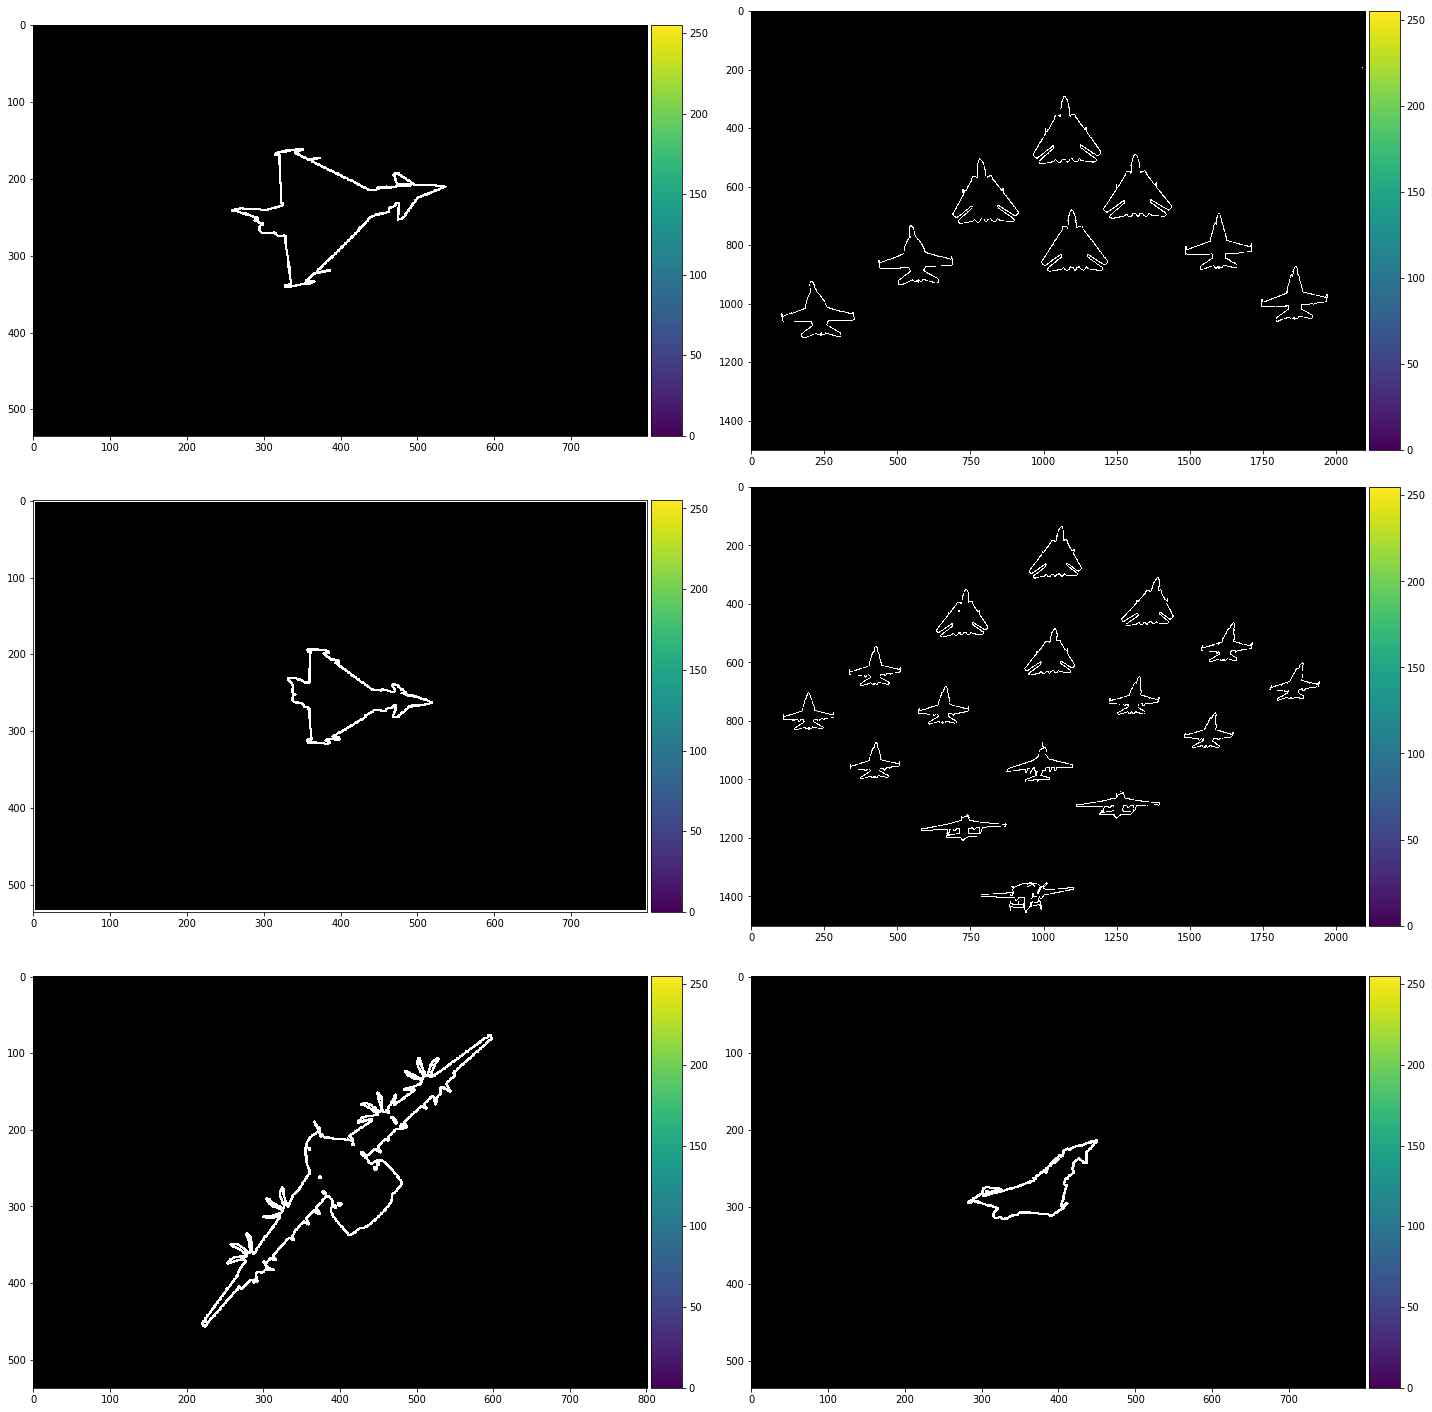

In [32]:
# Jak wczytujemy obrazek od razu do contur3, jego tablica jest 3d, a jak obrobimy go wczesniej jakąś funkcją do filtrowania
# typu gray, to jego tablica jest 2d
def main():
    img1 = 255 - Load.img('samolot10.jpg') #10
    img2 = 255 - Load.img('samolot05.jpg') #01
    img3 = Load.img('samolot08.jpg') #08
    img4 = 255 - Load.img('samolot00.jpg') #00
    img5 = 255 - Load.img('samolot11.jpg') #11
    img6 = 255 - Load.img('samolot09.jpg') #09
    
    figure(figsize=(20,20))
    
    contours1, img_contours1 = Filter.make_contour(img1)
    contours2, img_contours2 = Filter.make_contour(img2)
    contours3, img_contours3 = Filter.make_contour(img3)
    contours4, img_contours4 = Filter.make_contour(img4)
    contours5, img_contours5 = Filter.make_contour(img5)
    contours6, img_contours6 = Filter.make_contour(img6)
    
    subplot(3,2,1)
    cv2.drawContours(img_contours1, contours1, -1, (255,255,255), 2)
    io.imshow(img_contours1)
    subplot(3,2,2)
    cv2.drawContours(img_contours2, contours2, -1, (255,255,255), 2)
    io.imshow(img_contours2)
    subplot(3,2,3)
    cv2.drawContours(img_contours3, contours3, -1, (255,255,255), 2)
    io.imshow(img_contours3)
    subplot(3,2,4)
    cv2.drawContours(img_contours4, contours4, -1, (255,255,255), 2)
    io.imshow(img_contours4)
    subplot(3,2,5)
    cv2.drawContours(img_contours5, contours5, -1, (255,255,255), 2)
    io.imshow(img_contours5)
    subplot(3,2,6) 
    cv2.drawContours(img_contours6, contours6, -1, (255,255,255), 2)
    io.imshow(img_contours6)

if __name__ == '__main__':
    main()

In [50]:
img1 = Load.img('samolot02.jpg')
img1=255-img1
contours1, img_contours1 = Filter.make_contour(img1)
#cv2.drawContours(img, contours, contour_id, border_color, border_thickness)
cv2.drawContours(img_contours1, contours1, -1, (255,255,255), 2)
figure(figsize=(20,20))
cv2.imshow('',img_contours1)

cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

<Figure size 1440x1440 with 0 Axes>